Remove StandardHours and OVer18 columns because all the values are same.
Remove BusinessTravel as 71% of employees travel rarely.
Remove Daily Rate, Hourly Rate and Monthly Rate because these are all derived attributes to reduce multi-collinearity(dimensionality reduction).
Remove EmployeeCount as the value is 1 for all.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

MaritialStatus
1 'Single'
2 'Married'
3 'Divorced'

Gender
1 'Male'
2 'Female'

JobRole
1 'Sales Executive'
2 'Research Scientist'
3 'Laboratory Technician'
4 'Manufacturing Director'
5 'Healthcare Representative'
6 'Manager'
7 'Sales Representative'
8 'Research Director'
9 'Human Resources'

OverTime
1 'Yes'
2 'No'

Department
1 'Sales'
2 'Research & Development'
3 'Human Resources'

Attrition
1 'Yes'
2 'No'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('hr_dataset.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.shape

(1470, 35)

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

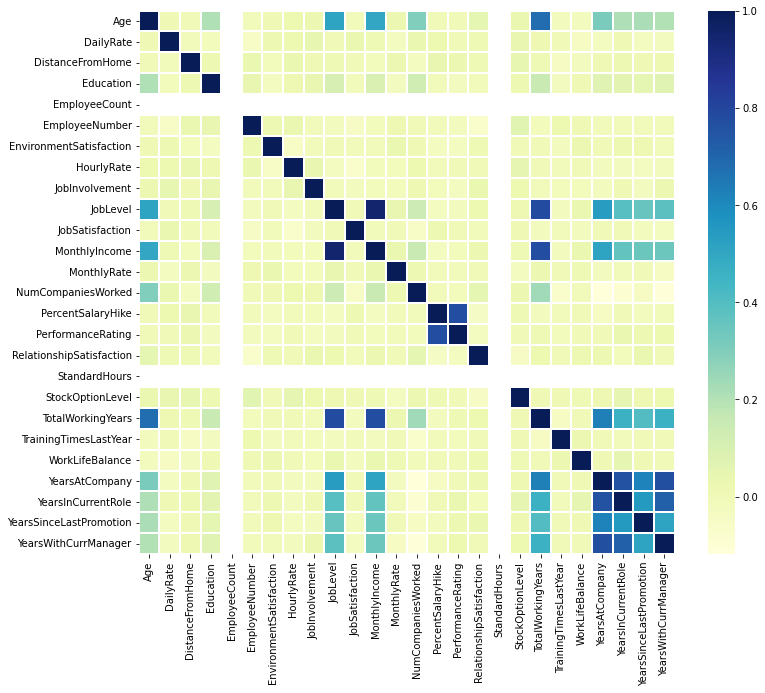

In [7]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(12, 10))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [8]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [9]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
data.Over18.unique()

array(['Y'], dtype=object)

In [11]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [13]:
data.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [14]:
df=data.drop(columns=['Over18','StandardHours','EmployeeCount','BusinessTravel','DailyRate','MonthlyRate','HourlyRate'])

In [15]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Department                1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   Education                 1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   EmployeeNumber            1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [18]:
df.to_csv('final_dataset.csv')

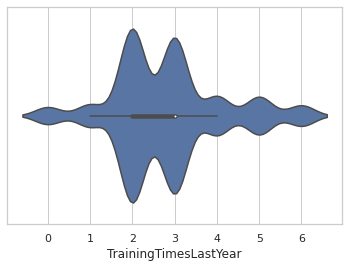

In [19]:
sns.set_theme(style="whitegrid")
train_vplot = sns.violinplot(x=df["TrainingTimesLastYear"])


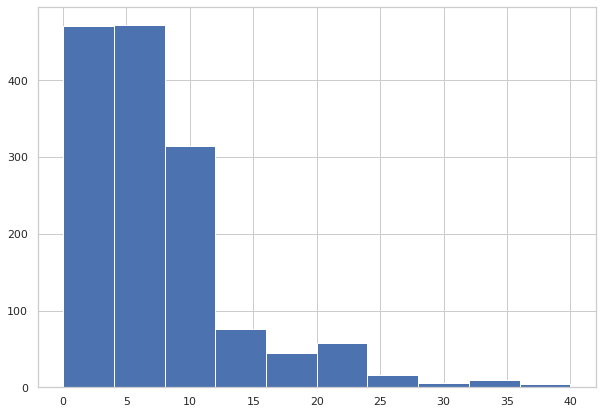

In [33]:
fig = plt.figure(figsize =(10, 7))
plt.hist(df["YearsAtCompany"])
plt.show()

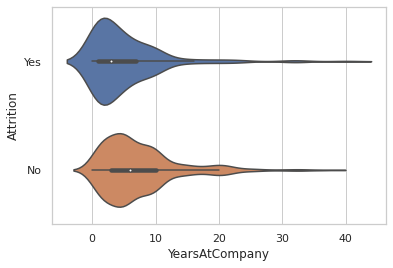

In [20]:
sns.set_theme(style="whitegrid")
ycompany_attr_vplot = sns.violinplot(x=df["YearsAtCompany"], y=df["Attrition"])

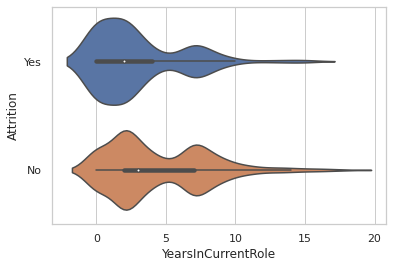

In [21]:
sns.set_theme(style="whitegrid")
ycurrentrole_vplot = sns.violinplot(x=df["YearsInCurrentRole"], y=df["Attrition"])

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

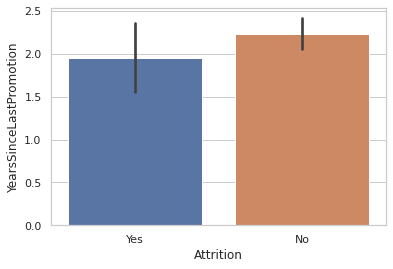

In [32]:
sns.barplot(x = 'Attrition',y = 'YearsSinceLastPromotion',data = df)


/home/anu/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anu/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


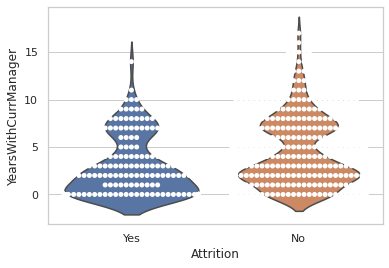

In [30]:
ax = sns.violinplot(x=df["Attrition"], y=df["YearsWithCurrManager"], inner=None)
ax = sns.swarmplot(x=df["Attrition"], y=df["YearsWithCurrManager"],
                   color="white", edgecolor="gray")

/home/anu/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anu/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anu/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/anu/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


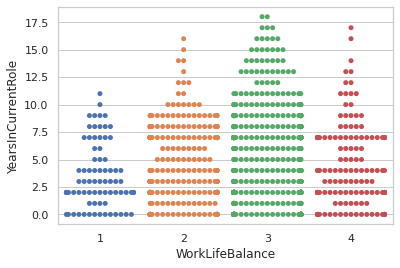

In [28]:
sns.set_theme(style="whitegrid")
ycurrmanager_swarmplot = sns.swarmplot(y=df['YearsInCurrentRole'], x=df["WorkLifeBalance"])

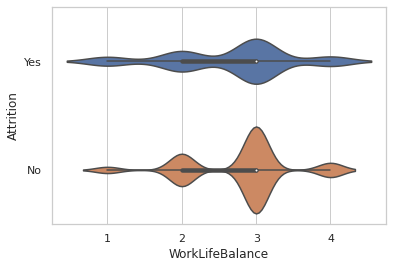

In [31]:
sns.set_theme(style="whitegrid")
ycurrentrole_vplot = sns.violinplot(x=df["WorkLifeBalance"], y=df["Attrition"])

In [42]:
du=(df.groupby(["Attrition","WorkLifeBalance","JobInvolvement"]).count()["Age"]/df.groupby(["WorkLifeBalance","JobInvolvement"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)

Count
WorkLifeBalance JobInvolvement Attrition          
1               1              No         0.250000
                               Yes        0.750000
                2              No         0.631579
                               Yes        0.368421
                3              No         0.705882
                               Yes        0.294118
                4              No         1.000000
2               1              No         0.550000
                               Yes        0.450000
                2              No         0.804878
                               Yes        0.195122
                3              No         0.853659
                               Yes        0.146341
                4              No         0.918919
                               Yes        0.081081
3               1              No         0.716981
                               Yes        0.283019
                2              No         0.836910
                               Yes        0.163090
                3              No         0.875969
                               Yes        0.124031
                4              No         0.890110
                               Yes        0.109890
4               1              No         0.833333
                               Yes        0.166667
                2              No         0.756098
                               Yes        0.243902
                3              No         0.833333
                               Yes        0.166667
                4              No         1.000000

<AxesSubplot:xlabel='WorkLifeBalance,JobInvolvement,Attrition'>

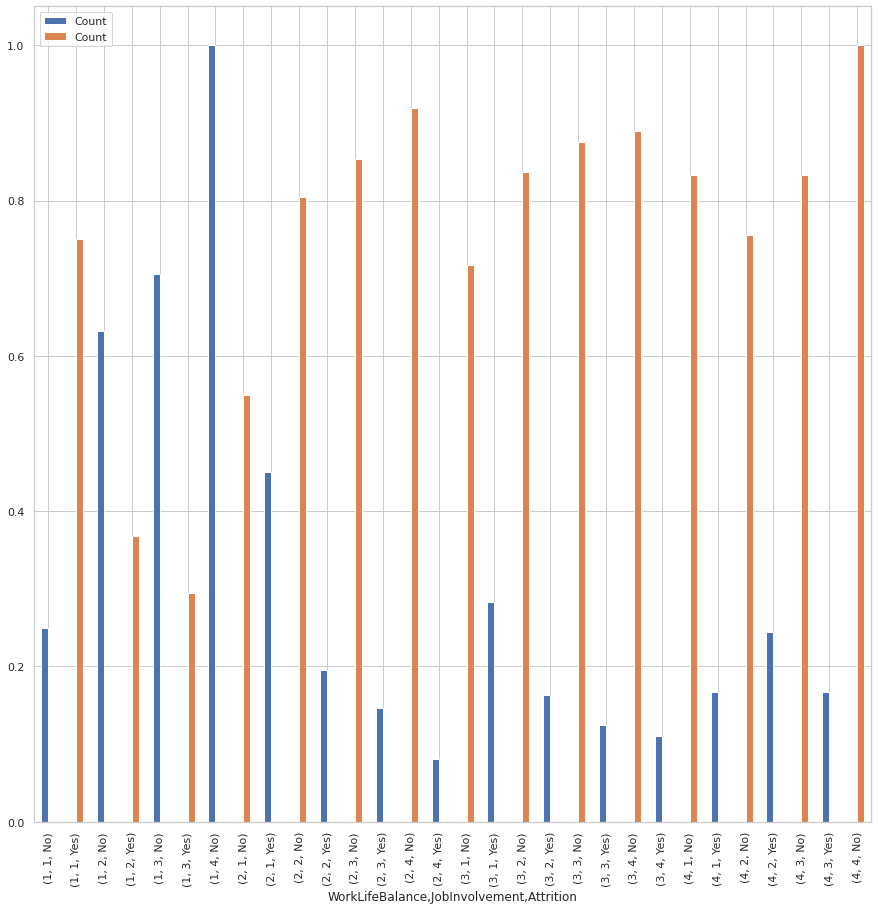

In [43]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,15))

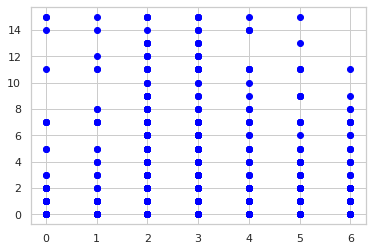

In [51]:
plt.scatter(x=df["Years"], y=df["YearsSinceLastPromotion"], c ="blue")
plt.show()

In [74]:
du=(df.groupby(["JobRole","Attrition"]).count()["Age"]/df.groupby(["JobRole"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)

<AxesSubplot:xlabel='JobRole,Attrition'>

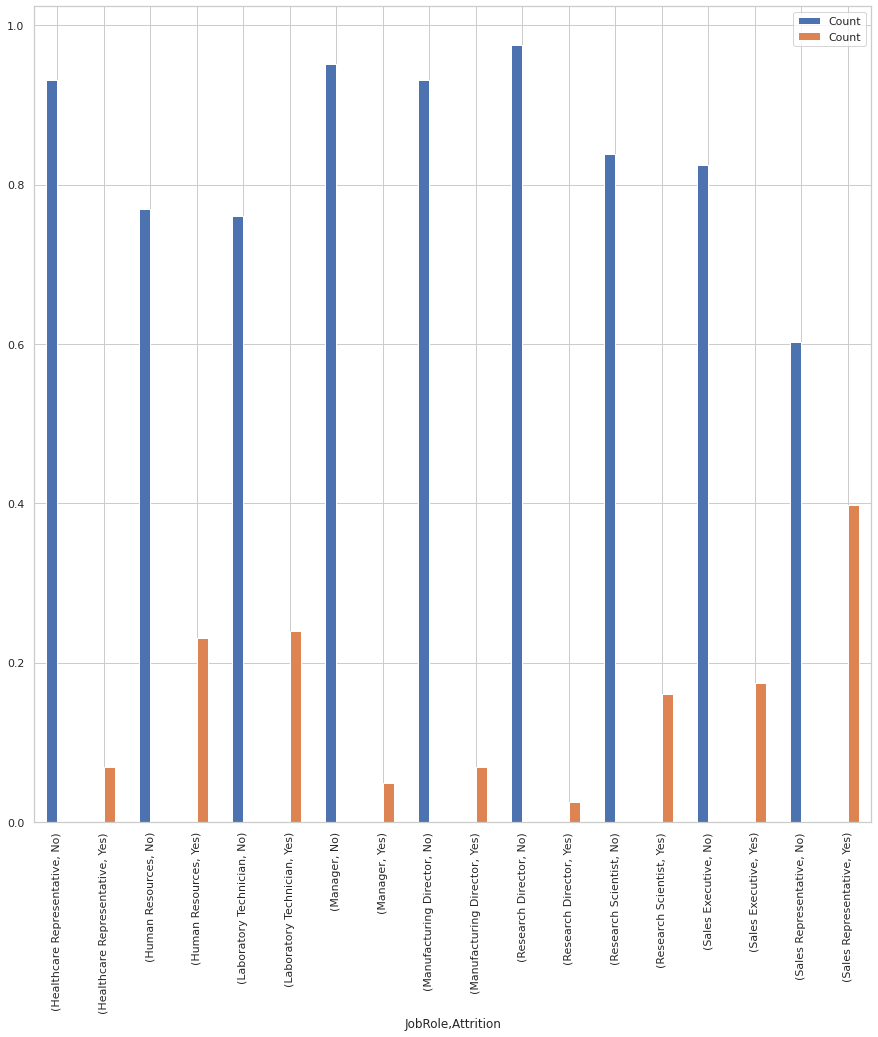

In [75]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,15))

<AxesSubplot:xlabel='JobRole', ylabel='YearsSinceLastPromotion'>

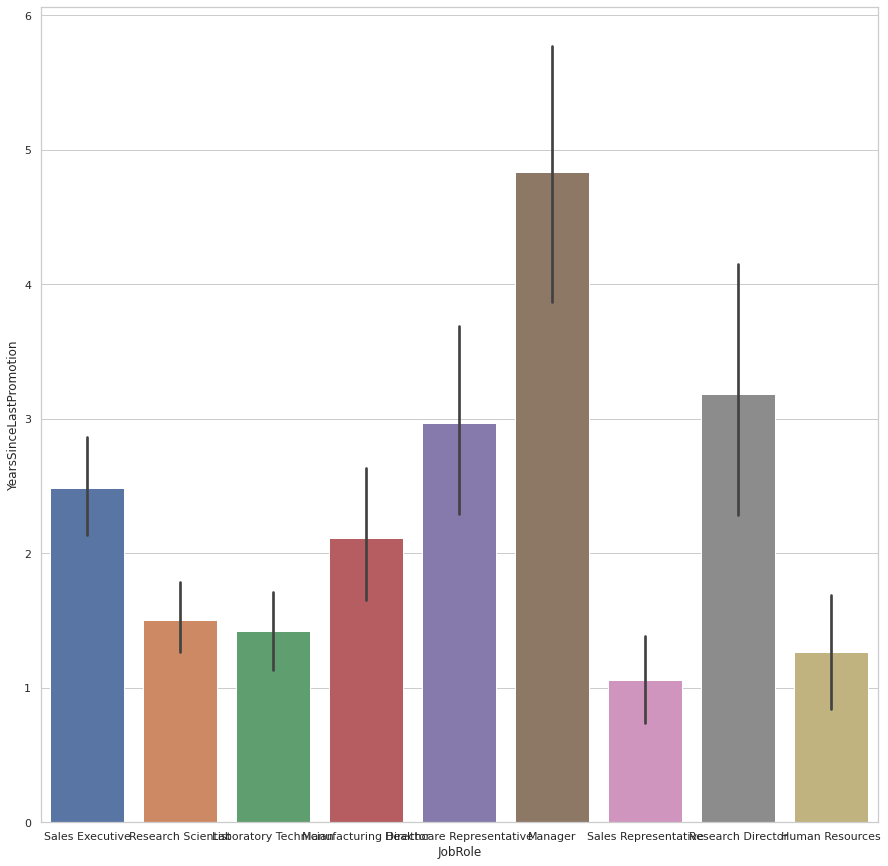

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.barplot(x = 'JobRole',y = 'YearsSinceLastPromotion',data = df)


In [76]:
du=(df.groupby(["WorkLifeBalance","Department","Attrition"]).count()["Age"]/df.groupby(["Department"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)

<AxesSubplot:xlabel='WorkLifeBalance,Department,Attrition'>

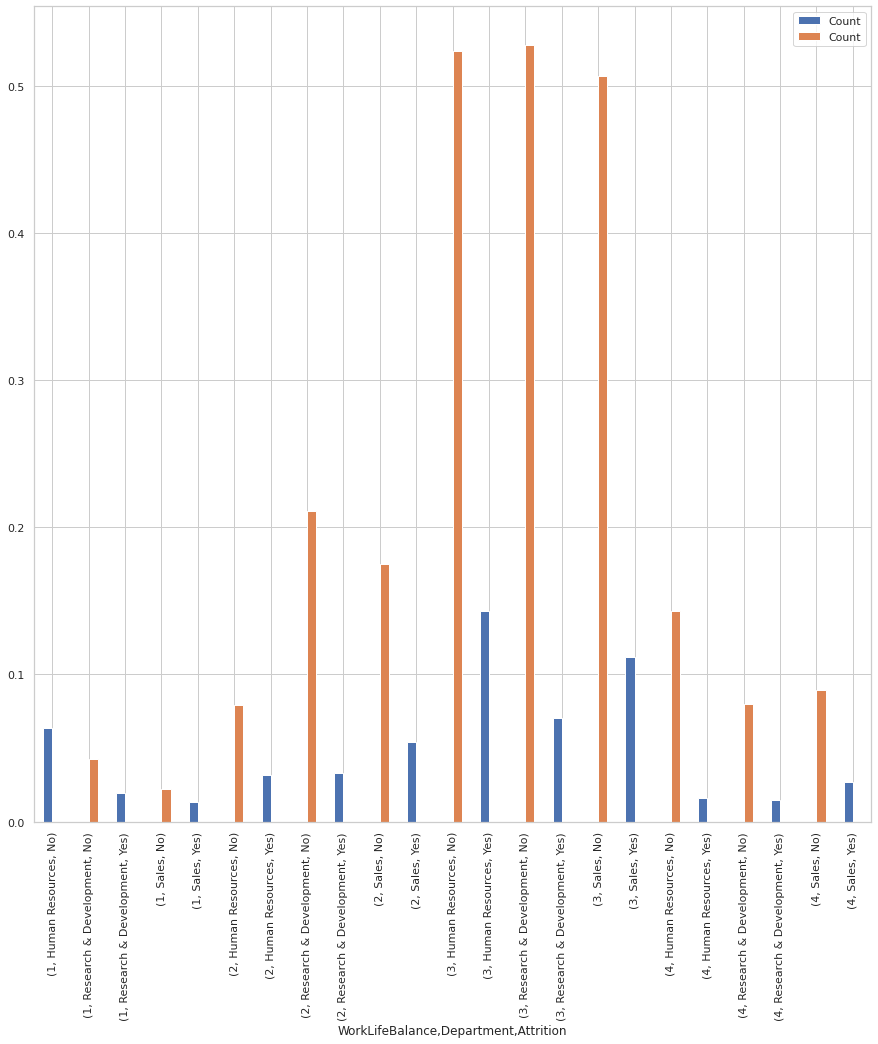

In [77]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,15))

In [87]:
du=(df.groupby(["JobRole","OverTime","Attrition"]).count()["Age"]/df.groupby(["OverTime"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)

<AxesSubplot:xlabel='JobRole,OverTime,Attrition'>

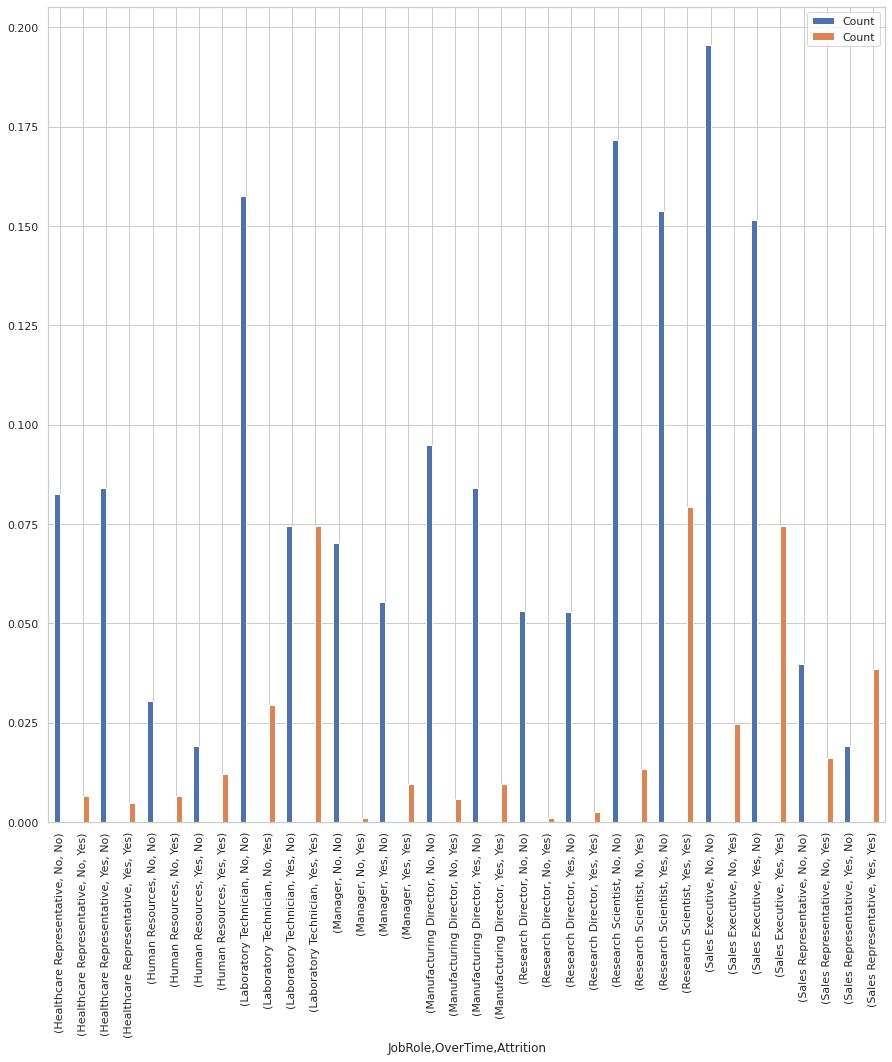

In [88]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,15))

In [89]:
du=(df.groupby(["JobRole","JobSatisfaction","Attrition"]).count()["Age"]/df.groupby(["JobRole"]).count()["Age"])
du=du.to_frame()
du=du.rename(columns = {'Age': 'Count'}, inplace = False)

<AxesSubplot:xlabel='JobRole,JobSatisfaction,Attrition'>

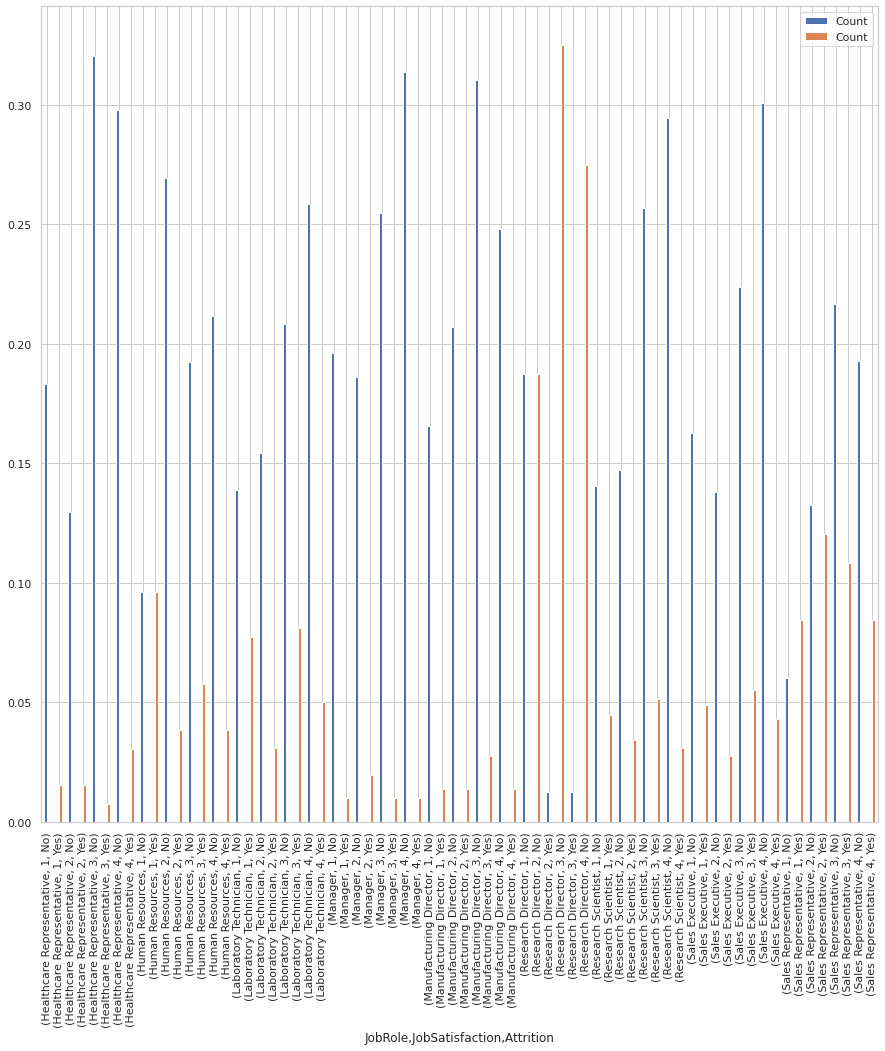

In [90]:
pd.concat(
    [du.iloc[::2], du.iloc[1::2]],
    axis=1).plot.bar(figsize=(15,15))